            AQI grade  PM25  PM10  SO2   CO  NO2  O3_8h
date                                                   
2013-12-02  223  重度污染   173   219   65  1.8  111     31
2013-12-03  246  重度污染   196   222   51  1.8  125     33
2013-12-04  260  重度污染   210   265   31  2.3  111     52
2013-12-05  305  严重污染   255   288   40  2.3  126     52
2013-12-06  412  严重污染   368   373   40  2.9  105     12
(2019, 8)
****************************************************************************************************
            AQI  PM25  PM10  SO2   CO  NO2  O3_8h
date                                             
2013-12-02  223   173   219   65  1.8  111     31
2013-12-03  246   196   222   51  1.8  125     33
2013-12-04  260   210   265   31  2.3  111     52
2013-12-05  305   255   288   40  2.3  126     52
2013-12-06  412   368   373   40  2.9  105     12
训练集统计描述：
            AQI     PM25     PM10      SO2       CO      NO2    O3_8h
count  1817.00  1817.00  1817.00  1817.00  1817.00  1817.00  1817.00

c:\users\huashuo1\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
c:\users\huashuo1\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:38: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
c:\users\huashuo1\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:39: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
c:\users\huashuo1\a

[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, criterion=mse, bootstrap=False, total=   1.0s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, criterion=mse, bootstrap=False 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, criterion=mse, bootstrap=False, total=   1.0s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, criterion=mse, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, criterion=mse, bootstrap=False, total=   1.0s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=100, criterion=mse, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=100, criterion=mse, bootstrap=False, total=   4.8s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=100, criterion=mse, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=100, criterion=mse, bootstrap=False, total=   4.5s
[CV] n_estimators=800, min_sample

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  6.7min finished


{'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 70, 'criterion': 'mse', 'bootstrap': True}


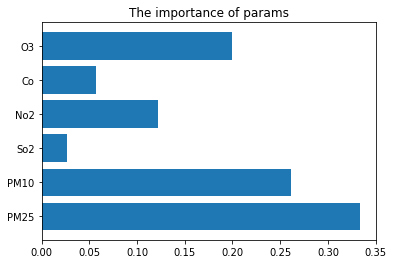

决策树模型评估--训练集：
训练r^2: 0.9829462862329733
均方差 28.259222931297728
绝对差 1.9678093949324018
解释度 0.9829462862329733
决策树模型评估--验证集：
验证r^2: 0.9507881453350994
均方差 71.50652415912737
绝对差 3.5485908734330334
解释度 0.9512254612713287


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error,explained_variance_score,mean_absolute_error,r2_score
#from sklearn.preprocessing import LabelEncoder
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import classification_report

data=pd.read_csv('苏州.csv',index_col=0)
print (data.head())
print (data.shape)
print('*'*100)
index=data.index
col=data.columns
class_names=np.unique(data.ix[:,-1])
#print (type(data))
#print (class_names)
#print (data.describe())

data1 = data.drop([u'grade'],axis = 1)

print(data1.head())

#划分训练集和验证集
data_train, data_test= train_test_split(data1,test_size=0.1, random_state=0)
print ("训练集统计描述：\n",data_train.describe().round(2))
print ("验证集统计描述：\n",data_test.describe().round(2))
#print ("训练集信息：\n",data_train.ix[:,-1].value_counts())
#print ("验证集信息：\n",data_test.ix[:,-1].value_counts())
print(data_train.head())
print(data_test.head())
print('*'*100)

X_train=data_train.ix[:,1:]
X_test=data_test.ix[:,1:]
feature=data_train.ix[:,1:].columns
print (feature)
#回归的训练和验证因变量数据AQI
y_train=data_train.ix[:,0]
y_test=data_test.ix[:,0]
#print (y_test)

#print('X_train'+'*'*50)
#print(X_train)
#print('y_train'+'*'*50)
#print(y_train)

print(data1.corr())
print('*'*100)

#sns.set(style="ticks", color_codes=True);
# 创建自定义颜色调色板
#palette = sns.xkcd_palette(['dark blue', 'dark green', 'gold', 'orange'])
# 画散点图矩阵
#sns.pairplot(data.drop([u'grade'],axis = 1), diag_kind = 'kde', plot_kws=dict(alpha = 0.7))
#plt.show()

##参数选择

criterion=['mae','mse']
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'criterion':criterion,
               'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

#构建模型
clf= RandomForestRegressor()
clf_random = RandomizedSearchCV(estimator=clf, param_distributions=random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs=1)

#回归
clf_random.fit(X_train,y_train)
print (clf_random.best_params_)


#模型训练、验证、评估
rf=RandomForestRegressor(criterion='mse',bootstrap=False,max_features='sqrt', max_depth=20,min_samples_split=10, n_estimators=1200,min_samples_leaf=2)

rf.fit(X_train, y_train) 
y_train_pred=rf.predict(X_train)
y_test_pred=rf.predict(X_test)
#变量重要性
plt.barh(range(len(rf.feature_importances_)), rf.feature_importances_,tick_label = ['PM25','PM10','So2','No2','Co','O3'])
plt.title('The importance of params')
plt.show()

print ("决策树模型评估--训练集：")
print ('训练r^2:',rf.score(X_train,y_train))
print ('均方差',mean_squared_error(y_train,y_train_pred))
print ('绝对差',mean_absolute_error(y_train,y_train_pred))
print ('解释度',explained_variance_score(y_train,y_train_pred))

print ("决策树模型评估--验证集：")
print ('验证r^2:',rf.score(X_test,y_test))
print ('均方差',mean_squared_error(y_test,y_test_pred))
print ('绝对差',mean_absolute_error(y_test,y_test_pred))
print ('解释度',explained_variance_score(y_test,y_test_pred))

#预测
data_pred=pd.read_csv('苏州-6.csv',index_col=0)
#print(data_pred)
data_pred1 = data_pred.drop([u'grade'],axis = 1)
data_pred1 = data_pred1.drop([u'AQI'],axis = 1)
#print('*'*100)
#print(data_pred1)
index=data_pred1.index
y_pred=rf.predict(data_pred1.values)
#print(y_pred.round(2))
#print (index)
#将预测结果保存到文件中
result_reg=pd.DataFrame(index)
result_reg['AQI']=y_pred
result_reg.to_csv('result_reg_city.txt',encoding='gb2312')

